In [1]:
import numpy as np
from nilearn import plotting
import nibabel as nib
from transformation import apply_transformations

In [2]:
path_image = '/home/jupyter/ai_postgraduate_project/data/resized_dataset/imagesTr/pancreas_358.nii.gz'
path_target = '/home/jupyter/ai_postgraduate_project/data/resized_dataset/labelsTr/pancreas_358.nii.gz'

image_nii =  nib.load(path_image)
target_nii =  nib.load(path_target)

In [3]:
image = np.array(image_nii.dataobj)
target = np.array(target_nii.dataobj)

In [ ]:
image_tr, target_tr = apply_transformations(
    image,
    target,
    apply_flip_axis_x = True,
    apply_flip_axis_y = True,
    apply_flip_axis_z = True,
    apply_gaussian_offset = True,
    apply_gaussian_noise = True,
    apply_elastic_transfor = True,
    sigma_gaussian_offset = None,
    sigma_gaussian_noise = None,
    alpha_elastic = None,
    sigma_elastic = None
)

Applying fip for axis 0
Applying fip for axis 1
Applying fip for axis 2
Applying gaussian offset
Applying noise
Applying elastic transformation


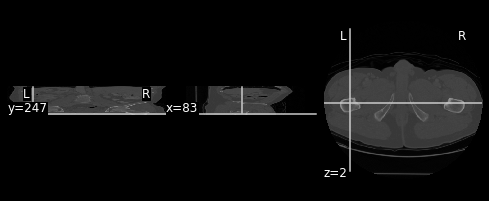

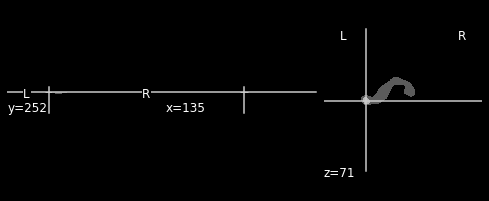

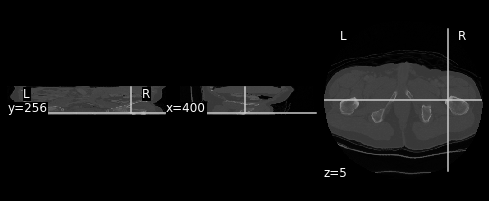

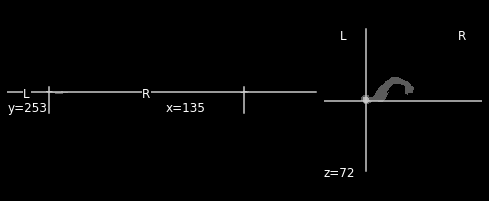

In [28]:
image_tr_niigz = nib.Nifti1Image(image_tr, affine=np.eye(4))
target_tr_niigz = nib.Nifti1Image(target_tr, affine=np.eye(4))

plotting.plot_anat(image_nii)
plotting.plot_anat(target_nii)

plotting.plot_anat(image_tr_niigz)
plotting.plot_anat(target_tr_niigz)